In [103]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
#Raw data is comma separated, so we present it in a pandas dataframe using the 'read_csv' method
data = pd.read_csv('Concrete_Data.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Exploratory Data Analysis

In [105]:
#Checking the total number of samples contained in the dataset
len(data)

1030

In [106]:
#Checking the dimension of the dataset, this shows us we have 1030 samples,8 features and one target variable
data.shape

(1030, 9)

In [107]:
#Showin general type information of each column in the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [108]:
#This shows general statistical information of each column in the dataframe such as mean, standard deviation,first quartile etc.
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [109]:
#Counting the total number of missing values in each column
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

<AxesSubplot:>

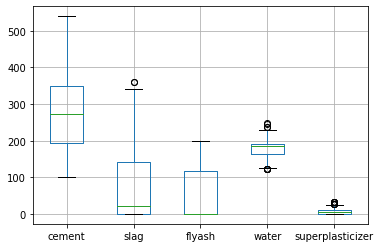

In [110]:
#Visualizing columns to identify outliers in the dataset
data.boxplot(column=['cement','slag','flyash','water','superplasticizer'])

Text(0.5, 0, 'superplasticizer')

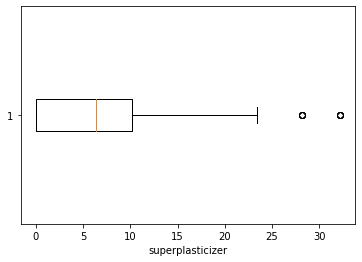

In [11]:
plt.boxplot(data['superplasticizer'],vert=False)
plt.xlabel("superplasticizer")

<AxesSubplot:>

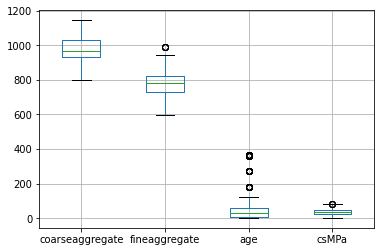

In [12]:
data.boxplot(column=['coarseaggregate','fineaggregate','age','csMPa'])

Text(0.5, 0, 'water')

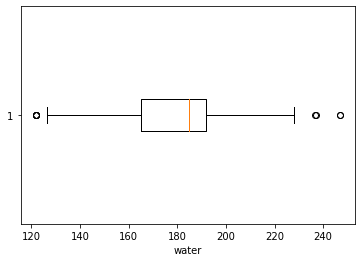

In [13]:
plt.boxplot(data['water'],vert=False)
plt.xlabel("water")

Text(0.5, 0, 'csMPa')

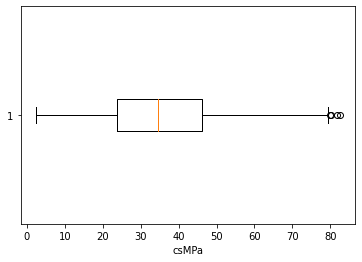

In [14]:
plt.boxplot(data['csMPa'],vert=False)
plt.xlabel("csMPa")

In [3]:
import scipy as sp

In [95]:
win_data= data
outly_col=['water','superplasticizer','age','slag','csMPa','fineaggregate']

In [96]:
#Handling outliers by winsorization
for col in outly_col:
    win_data[col]=sp.stats.mstats.winsorize(data[col],[0.1,0.2]).data


<AxesSubplot:>

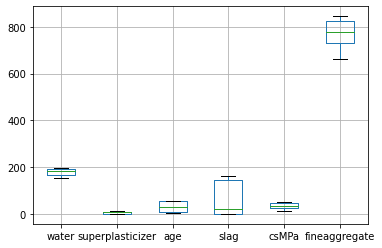

In [18]:
win_data.boxplot(column=outly_col)

<AxesSubplot:>

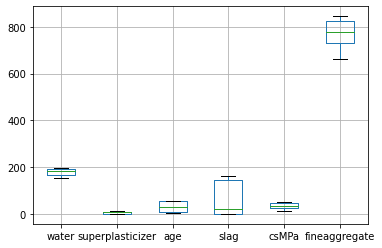

In [19]:
data.boxplot(column=outly_col)

In [20]:
#Presenting the correlation matrix of all columns in a  dataframe
data.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.267930,-0.397467,-0.124104,-0.016872,-0.109349,-0.207583,0.013008,0.461481
slag,-0.267930,1.000000,-0.304447,0.079461,0.068999,-0.320885,-0.285984,-0.021449,0.136739
flyash,-0.397467,-0.304447,1.000000,-0.296346,0.517608,-0.009961,0.081291,0.019948,-0.073699
water,-0.124104,0.079461,-0.296346,1.000000,-0.692372,-0.138318,-0.310906,0.005568,-0.335029
superplasticizer,-0.016872,0.068999,0.517608,-0.692372,1.000000,-0.216841,0.159318,0.021104,0.321495
coarseaggregate,-0.109349,-0.320885,-0.009961,-0.138318,-0.216841,1.000000,-0.124749,-0.024879,-0.170153
fineaggregate,-0.207583,-0.285984,0.081291,-0.310906,0.159318,-0.124749,1.000000,-0.041049,-0.198943
age,0.013008,-0.021449,0.019948,0.005568,0.021104,-0.024879,-0.041049,1.000000,0.599701
csMPa,0.461481,0.136739,-0.073699,-0.335029,0.321495,-0.170153,-0.198943,0.599701,1.000000


In [21]:
win_data.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.267930,-0.397467,-0.124104,-0.016872,-0.109349,-0.207583,0.013008,0.461481
slag,-0.267930,1.000000,-0.304447,0.079461,0.068999,-0.320885,-0.285984,-0.021449,0.136739
flyash,-0.397467,-0.304447,1.000000,-0.296346,0.517608,-0.009961,0.081291,0.019948,-0.073699
water,-0.124104,0.079461,-0.296346,1.000000,-0.692372,-0.138318,-0.310906,0.005568,-0.335029
superplasticizer,-0.016872,0.068999,0.517608,-0.692372,1.000000,-0.216841,0.159318,0.021104,0.321495
coarseaggregate,-0.109349,-0.320885,-0.009961,-0.138318,-0.216841,1.000000,-0.124749,-0.024879,-0.170153
fineaggregate,-0.207583,-0.285984,0.081291,-0.310906,0.159318,-0.124749,1.000000,-0.041049,-0.198943
age,0.013008,-0.021449,0.019948,0.005568,0.021104,-0.024879,-0.041049,1.000000,0.599701
csMPa,0.461481,0.136739,-0.073699,-0.335029,0.321495,-0.170153,-0.198943,0.599701,1.000000


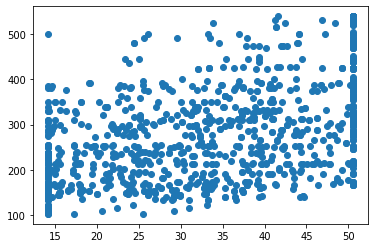

In [22]:
#Plotting the scatterplot of target variable csMPa against the cement variable
plt.scatter(data['csMPa'],data['cement'])

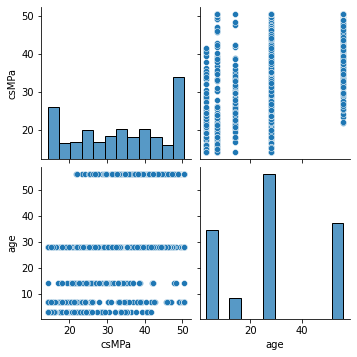

In [23]:

sns.pairplot(data[['csMPa','age']])

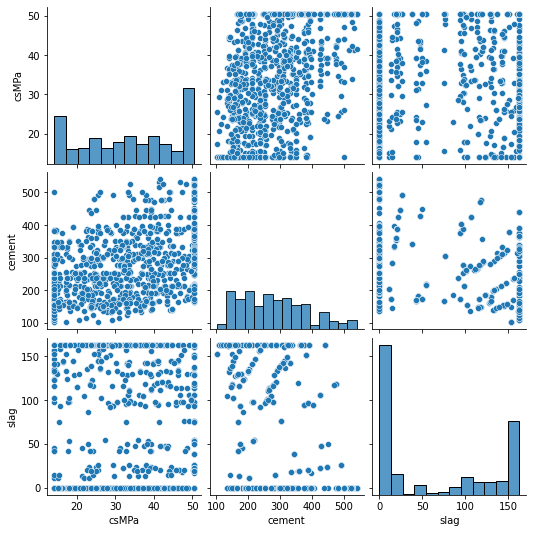

In [24]:
sns.pairplot(data[['csMPa','cement','slag']])

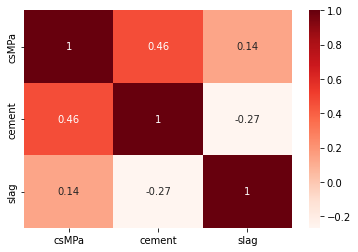

In [25]:
sns.heatmap(data[['csMPa','cement','slag']].corr(),annot=True, cmap = 'Reds')
plt.show()

<AxesSubplot:>

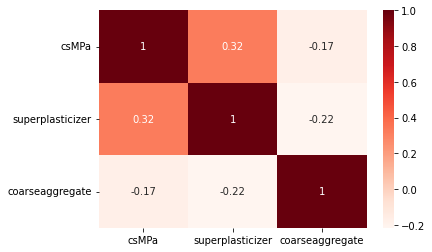

In [26]:
sns.heatmap(data[['csMPa','superplasticizer','coarseaggregate']].corr(),annot=True, cmap = 'Reds')

<AxesSubplot:>

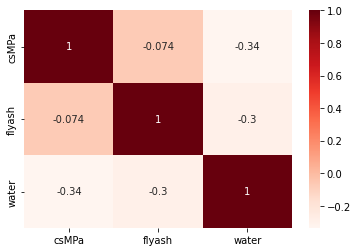

In [27]:
sns.heatmap(data[['csMPa','flyash','water']].corr(),annot=True, cmap = 'Reds')

<AxesSubplot:>

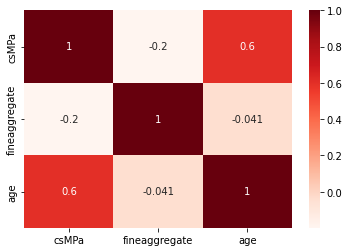

In [28]:
sns.heatmap(data[['csMPa','fineaggregate','age']].corr(),annot=True, cmap = 'Reds')

##### From the exploratory data analysis we are able to draw the following insights from the data
<ol>
    <li> The feature which has the highest degree of correlation with the target variable is age, followed by cement</li>
    <li> water and superplasticizer have a high degree of correlation hence, they can be combined to form a new feature</li>
    <li> Outliers present in the dataset have been handled by winsorization</li>
</ol>

### Data Preprocessing

In [98]:
#Importing necessary libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [100]:
#separating the target variable from the features
target = win_data['csMPa']
win_data1 = win_data.drop(columns='csMPa')

In [36]:
#Splitting the data into training,testing and validation sets
X_trainv,X_test,y_trainv,y_test = train_test_split(win_data1,target, train_size=0.75, random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainv,y_trainv, train_size=0.7, random_state=1)

In [37]:
print(X_train.shape,X_val.shape,X_test.shape)

(540, 8) (232, 8) (258, 8)


In [38]:
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_vals = scaler.transform(X_val)

### Model Construction

In [103]:
#Importing Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

In [104]:
#Here we instantiate all algorithms to be used
lr,dtr,etr,rr,xgr,gbr,rfr,svr,sgr = LinearRegression(),DecisionTreeRegressor(),ExtraTreeRegressor(),Ridge(),XGBRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),SVR(),SGDRegressor()

In [105]:
#Creating a list of regressors to be iterated over with a for loop and computing all of their R2 scores(NB: This is the metric used to evaluate the accuracies of the resulting models)
regressors = [lr,dtr,etr,rr,xgr,gbr,rfr,svr,sgr]
for regressor in regressors:
    regressor.fit(X_trains,y_train)
train_accuracies= [regressor.score(X_trains,y_train) for regressor in regressors]
test_accuracies= [regressor.score(X_vals,y_val) for regressor in regressors]

In [106]:
#Adding knr to the fold
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor(n_neighbors=5)
knr.fit(X_trains,y_train)
train_accuracies.append(knr.score(X_trains,y_train))
test_accuracies.append(knr.score(X_vals,y_val))

In [107]:
#Here, we present the R2 scores in a pandas dataframe
ind= ['LinearRegression','DecisionTreeRegressor','ExtraTreeRegressor','Ridge','XGBRegressor',
      'GradientBoostingRegressor','RandomForestRegressor','SVR','SGDRegressor','KNeighborsRegressor']
accuracy_df = pd.DataFrame(columns=['train_accuracies','test_accuracies'], index =ind)
accuracy_df['train_accuracies'] = train_accuracies
accuracy_df['test_accuracies'] = test_accuracies
accuracy_df

,train_accuracies,test_accuracies
LinearRegression,0.769170,0.758308
DecisionTreeRegressor,0.987520,0.789676
ExtraTreeRegressor,0.987520,0.814201
Ridge,0.769156,0.758173
XGBRegressor,0.987317,0.911792
GradientBoostingRegressor,0.937503,0.888800
RandomForestRegressor,0.973634,0.897091
SVR,0.772564,0.746525
SGDRegressor,0.768550,0.756121
KNeighborsRegressor,0.857332,0.793453


In [108]:
impt_features1 = rfr.feature_importances_#Important features to tree models
impt_features2 =rr.coef_#Important features to linear models

In [109]:
cols=list(win_data1.columns)

([<matplotlib.axis.YTick at 0x16440d21b50>,
 [Text(0, 0, 'cement'),
  Text(0, 1, 'slag'),
  Text(0, 2, 'flyash'),
  Text(0, 3, 'water'),
  Text(0, 4, 'superplasticizer'),
  Text(0, 5, 'coarseaggregate'),
  Text(0, 6, 'fineaggregate'),
  Text(0, 7, 'age')])

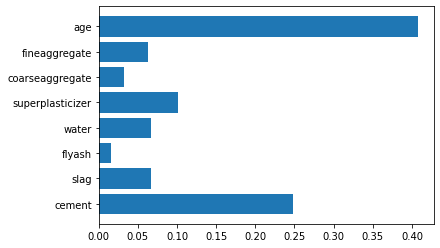

In [110]:
#Checking the most relevant features
plt.barh(range(8),impt_features1,align='center')
plt.yticks(np.arange(8),labels=cols)


([<matplotlib.axis.YTick at 0x16440525fa0>,
 [Text(0, 0, 'cement'),
  Text(0, 1, 'slag'),
  Text(0, 2, 'flyash'),
  Text(0, 3, 'water'),
  Text(0, 4, 'superplasticizer'),
  Text(0, 5, 'coarseaggregate'),
  Text(0, 6, 'fineaggregate'),
  Text(0, 7, 'age')])

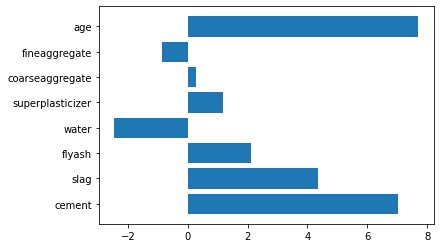

In [111]:
plt.barh(range(8),impt_features2,align='center')
plt.yticks(np.arange(8),labels=cols)

In [101]:
#fitting models without irrelevant features
win_data2 = win_data1.drop(columns='flyash')
X_trainv2,X_test2,y_trainv2,y_test2 = train_test_split(win_data2,target, train_size=0.75, random_state=0)
X_train2,X_val2,y_train2,y_val2 = train_test_split(X_trainv2,y_trainv2, train_size=0.7, random_state=1)

In [93]:
print(X_train2.shape,X_val2.shape,X_test2.shape)

(540, 7) (232, 7) (258, 7)


In [94]:
scaler = StandardScaler()
X_trains2 = scaler.fit_transform(X_train2)
X_vals2 = scaler.transform(X_val2)

In [95]:
knr= KNeighborsRegressor(n_neighbors=5)

In [96]:
regressors2 = [lr,dtr,etr,rr,xgr,gbr,rfr,svr,sgr,knr]
for regressor in regressors2:
    regressor.fit(X_trains2,y_train2)
train_accuracies2= [regressor.score(X_trains2,y_train2) for regressor in regressors2]
test_accuracies2= [regressor.score(X_vals2,y_val2) for regressor in regressors2]
ind= ['LinearRegression','DecisionTreeRegressor','ExtraTreeRegressor','Ridge','XGBRegressor',
      'GradientBoostingRegressor','RandomForestRegressor','SVR','SGDRegressor','KNeighborsRegressor']
accuracy_df2 = pd.DataFrame(columns=['train_accuracies2','test_accuracies2'], index =ind)
accuracy_df2['train_accuracies2'] = train_accuracies2
accuracy_df2['test_accuracies2'] = test_accuracies2
accuracy_df2

,train_accuracies2,test_accuracies2
LinearRegression,0.761870,0.754491
DecisionTreeRegressor,0.987520,0.790287
ExtraTreeRegressor,0.987520,0.821480
Ridge,0.761868,0.754422
XGBRegressor,0.987378,0.906883
GradientBoostingRegressor,0.938243,0.885462
RandomForestRegressor,0.974202,0.893942
SVR,0.779056,0.745077
SGDRegressor,0.761844,0.753942
KNeighborsRegressor,0.863071,0.810722


#### The following observatons were made during the construction of the model
<ol>
    <li>Best performing algorithms are XGBregressor, RandomforestRegressor, and GradientBoostingRegressor</li>
    <li>The most important predicting features are cement and age. This result agrees with our earlier observation from the exploratory data analysis
    <li>Removing least important features to the linear models or treebased models did not improve the performance of the highest performing models</li>
</ol>

### Model Selection/Evaluation

In [126]:
#Splitting the data into training and test sets with training set size set to 75% of data
X_train,X_test,y_train,y_test = train_test_split(win_data1,target,train_size=0.75,random_state=0)

In [119]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [296]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [127]:
print(X_train.shape, X_test.shape)

(772, 8) (258, 8)


In [234]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [253]:
evaluation = {"Metrics" : ['Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R2 score', 'CV-mean']}
def evaluate_model(name, train_X, train_y, test_X, test_y, types, alg, plot=True):
    global evaluation, pred
    
    alg.fit(train_X, train_y)
    print(f"Score: {alg.score(test_X, test_y)}")
    if plot:
        fig, axes = plt.subplots(2, 1, figsize=(20, 10))
        try:
            if types == "Coefs":
                print(f"Intercept: {alg.intercept_}")
                try:
                    coefs = pd.DataFrame({"coefs" : alg.coef_, "col" : col_names})
                except:
                    coefs = pd.DataFrame({"coefs" : alg.coef_[0], "col" : col_names})
                sns.barplot(x="col", y="coefs", data=coefs, ax=axes[1]);
            else:
                features = pd.DataFrame({"features" : alg.feature_importances_, "col" : list(win_data1.columns)})
                sns.barplot(x="col", y="features", data=features, ax=axes[1]);
        except:
            pass
    else:
        plt.figure(figsize=(20,5));
        axes = [None]

    pred = alg.predict(test_X)
    rmsecm = np.sqrt(metrics.mean_squared_error(test_y,pred))
    mae = mean_absolute_error(test_y, pred)
    mse = mean_squared_error(test_y, pred)
    r2 = r2_score(test_y, pred)

    p = pd.DataFrame(pred, columns=[0])
    p["Type"] = "Predictions"
    p["n"] = list(range(p.shape[0]))
    t = test_y.copy()
    t = t.reset_index().set_index("index")
    t.columns = [0]
    t["Type"] = "Actual"
    t = t[t[0] != "Actual"]
    t["n"] = list(range(p.shape[0]))
    x = pd.concat([p,t], axis=0).reset_index()
    sns.lineplot(x="n", y=0, hue="Type", data=x, markers=["o", "o"], style="Type", ax=axes[0]);
    
    cv = cross_val_score(alg, win_data1, target, cv=10)
    cv_mean = cv.ravel().mean()
    
    evaluation[name] = [rmsecm, mae, mse, r2, cv_mean]
    df_ev = pd.DataFrame(evaluation)
    plt.show()
    return df_ev, cv

##### XGBRegressor

In [156]:
param_grid={'n_estimators':[100,120,150,180],'max_depth':[5,6,7],'learning_rate':[0.1,0.12,0.15], 'gamma':[1.7,1.8,1.9,2,2.1]}

In [147]:
def make_df(list1,list2,ind):
    df = pd.DataFrame(columns=['Train_acc','Test_acc'],index=ind)
    df['Train_acc']=list1
    df['Test_acc']=list2
    return df

In [239]:
from xgboost.sklearn import XGBRegressor
gamma=[1.7,1.8,1.9,2,2.1]
train_sc=[]
test_sc=[]
for num in gamma:
    xgb = XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1, gamma=num,random_state=1)
    xgb.fit(X_train, y_train)
    train_sc.append(xgb.score(X_train, y_train))
    test_sc.append(xgb.score(X_test,y_test))
make_df(train_sc,test_sc,gamma)

,Train_acc,Test_acc
1.7,0.981839,0.905791
1.8,0.981775,0.906686
1.9,0.982122,0.906622
2.0,0.982595,0.910171
2.1,0.981368,0.907324


In [240]:
grid_search= GridSearchCV(XGBRegressor(random_state=1),param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=1, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
          

In [241]:
grid_search.best_params_

{'gamma': 2.1, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 150}

In [242]:
grid_search.best_score_

0.917798311622873

In [243]:
grid_search.score(X_test,y_test)

0.9087080263600452

Score: 0.9087080263600452


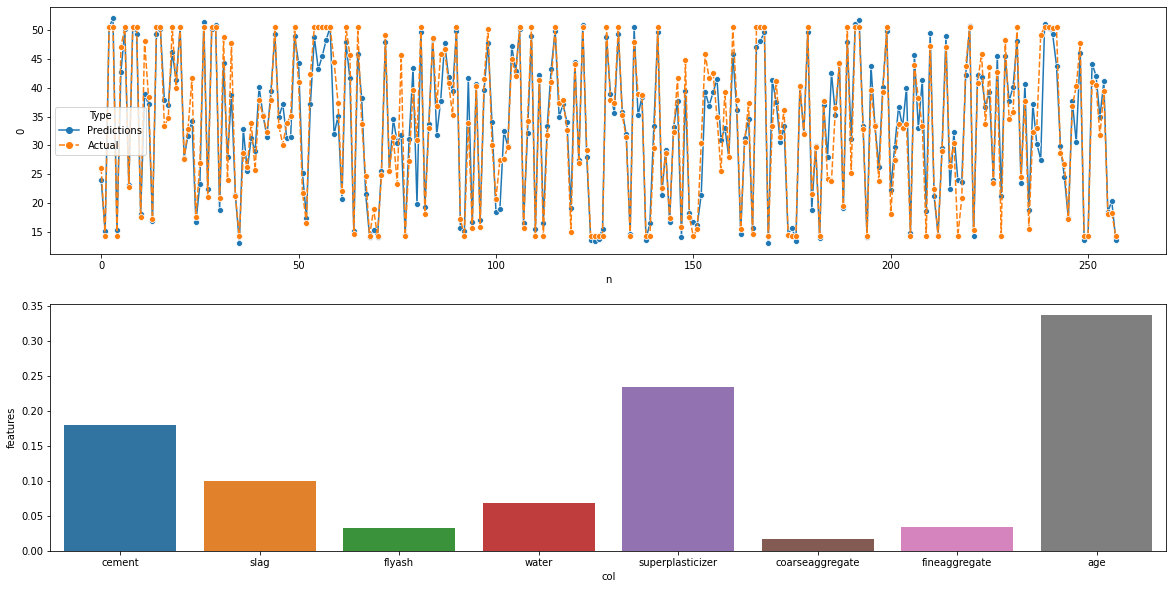

(                          Metrics  XGBRegressor
 0  Root Mean Squared Error (RMSE)      3.830223
 1       Mean Absolute Error (MAE)      2.528096
 2        Mean Squared Error (MSE)     14.670611
 3                        R2 score      0.908708
 4                         CV-mean      0.785277,
 array([0.53783831, 0.87522469, 0.75271517, 0.73616799, 0.7092946 ,
        0.65028228, 0.86143455, 0.8449579 , 0.9381028 , 0.94675546]))

In [237]:
algorithm= XGBRegressor(gamma=2.1,learning_rate=0.15,max_depth=6,n_estimators=150)
evaluate_model('XGBRegressor',X_train,y_train,X_test,y_test,'tree',algorithm,True)

### RandomForest Regressor

In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [165]:
rfr = RandomForestRegressor()
r_model= rfr.fit(X_train,y_train)
print(r_model.score(X_train,y_train))
print(r_model.score(X_test,y_test))

0.9781313257374954
0.897796758077653


In [166]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [167]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [168]:
rf_random.best_score_

0.8986293181882317

In [172]:
rf_random.score(X_test,y_test)

0.9001311742432765

In [171]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [249]:
grid_params={'n_estimators': [700,800,900,1000],'min_samples_split': [2], 'min_samples_leaf': [1,2,3,4,5], 'max_features': ['auto'],'random_state':[1], 'max_depth': [100,120,140,150],'bootstrap': [True]}

In [250]:
grid_search = GridSearchCV(RandomForestRegressor(),param_grid=grid_params,cv=5)

In [251]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [100, 120, 140, 150],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2],
                         'n_estimators': [700, 800, 900, 1000],
                         'random_state': [1]})

In [185]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [186]:
grid_search.best_score_

0.8989463671275294

In [187]:
grid_search.score(X_test,y_test)

0.8981944647900445

Score: 0.8975716716875854


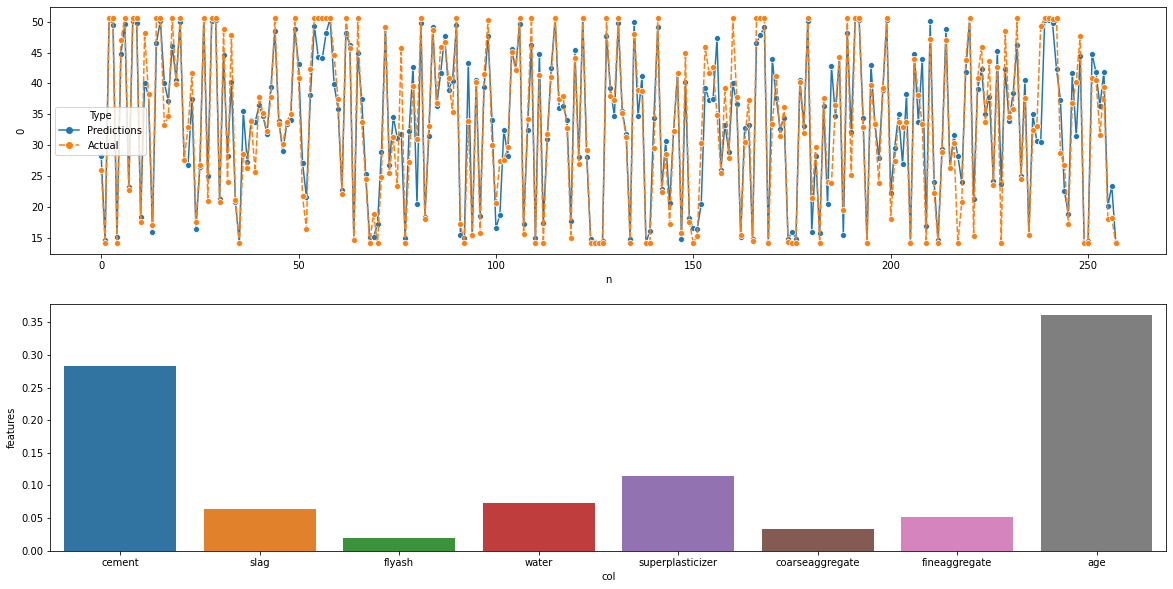

(                          Metrics  RandomForestRegressor
 0  Root Mean Squared Error (RMSE)               4.057120
 1       Mean Absolute Error (MAE)               2.682688
 2        Mean Squared Error (MSE)              16.460222
 3                        R2 score               0.897572
 4                         CV-mean               0.769335,
 array([0.52828891, 0.85177586, 0.75346472, 0.71568365, 0.6364742 ,
        0.6721591 , 0.83082772, 0.85131905, 0.9315795 , 0.9217744 ]))

In [256]:
algo = RandomForestRegressor(bootstrap=True,max_depth=100,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=700)
evaluate_model('RandomForestRegressor',X_train,y_train,X_test,y_test,'p',algo,True)

### Gradient Boosting Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,

In [197]:
ccp_alpha = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005]

In [199]:
Tr=[]
Te=[]
for alph in ccp_alpha:
    grb = GradientBoostingRegressor(ccp_alpha=alph,random_state=1)
    grb.fit(X_train,y_train)
    Tr.append(grb.score(X_train,y_train))
    Te.append(grb.score(X_test,y_test))
make_df(Tr,Te,ccp_alpha)

,Train_acc,Test_acc
0.0001,0.934977,0.881022
0.0002,0.934977,0.881022
0.0003,0.934977,0.881022
0.0004,0.934977,0.881022
0.0005,0.934977,0.881429
0.0006,0.934977,0.881429
0.0007,0.934977,0.881429
0.0008,0.934977,0.881429
0.0009,0.935436,0.880968
0.0010,0.935436,0.880968


In [201]:
grid_params={'n_estimators':[100,200,300,400,500,600,700,800],'learning_rate':[0.001,0.0005,0.005,0.01,0.05,0.08],'max_depth':[5,6,7],'ccp_alpha':[0.0005,0.0006,0.0007],'random_state':[1]}

In [202]:
grid_search = GridSearchCV(GradientBoostingRegressor(),grid_params,cv=4)

In [203]:
model= grid_search.fit(X_train,y_train)

In [204]:
grid_search.best_params_

{'ccp_alpha': 0.0005,
 'learning_rate': 0.08,
 'max_depth': 5,
 'n_estimators': 300,
 'random_state': 1}

In [205]:
grid_search.best_score_

0.9113647138378239

In [206]:
grid_search.score(X_test,y_test)

0.9221811347853602

In [209]:
results_df=pd.DataFrame(grid_search.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_learning_rate,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.531970,0.069237,0.008005,0.000007,0.0005,0.001,5,100,1,"{'ccp_alpha': 0.0005, 'learning_rate': 0.001, ...",0.112909,0.125373,0.143490,0.139224,0.130249,0.012045,418
1,0.797630,0.023457,0.008000,0.000002,0.0005,0.001,5,200,1,"{'ccp_alpha': 0.0005, 'learning_rate': 0.001, ...",0.228868,0.244206,0.259168,0.260249,0.248123,0.012798,391
2,1.205097,0.036543,0.010002,0.003464,0.0005,0.001,5,300,1,"{'ccp_alpha': 0.0005, 'learning_rate': 0.001, ...",0.324197,0.343756,0.356191,0.368758,0.348226,0.016450,365
3,1.594270,0.051199,0.023939,0.021868,0.0005,0.001,5,400,1,"{'ccp_alpha': 0.0005, 'learning_rate': 0.001, ...",0.403993,0.427618,0.440070,0.456887,0.432142,0.019287,337
4,2.056296,0.146532,0.010004,0.003463,0.0005,0.001,5,500,1,"{'ccp_alpha': 0.0005, 'learning_rate': 0.001, ...",0.472882,0.498932,0.509530,0.529246,0.502648,0.020339,323


In [210]:
results_df.shape

(432, 17)

In [231]:
regressor = GradientBoostingRegressor(ccp_alpha=0.0005,learning_rate=0.08,max_depth=5,n_estimators=300,random_state=1)

Score: 0.9221811347853602


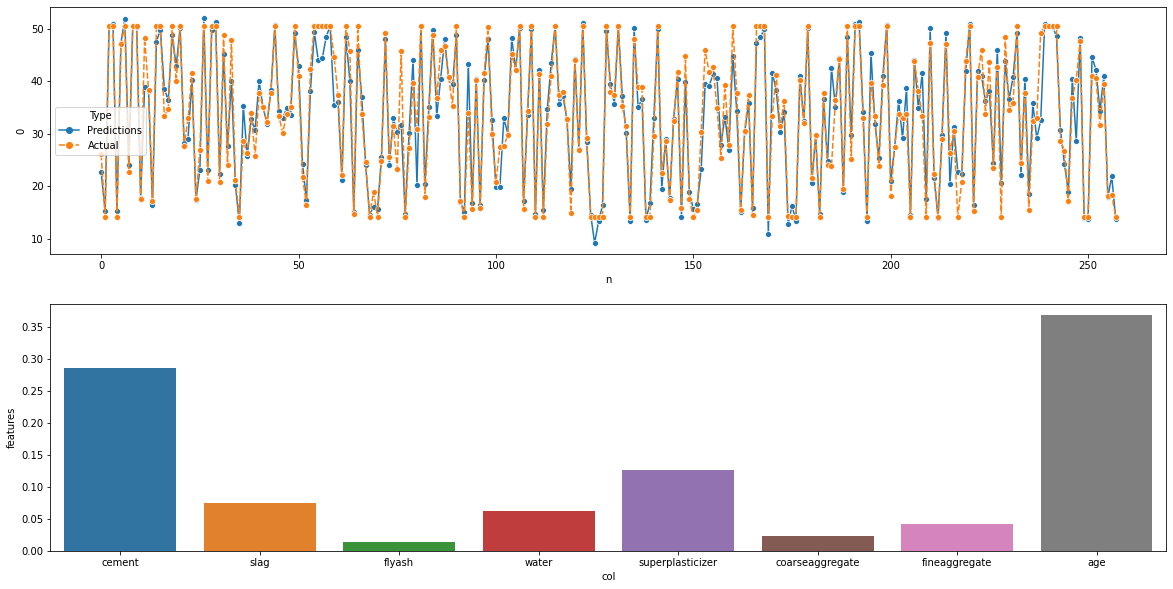

(                          Metrics  GradientBoostingRegressor
 0  Root Mean Squared Error (RMSE)                   3.536309
 1       Mean Absolute Error (MAE)                   2.345200
 2        Mean Squared Error (MSE)                  12.505484
 3                        R2 score                   0.922181
 4                         CV-mean                   0.796151,
 array([0.53251824, 0.87992406, 0.74209673, 0.78825171, 0.70042783,
        0.66555981, 0.86194584, 0.89134896, 0.94644265, 0.95299372]))

In [232]:
evaluate_model('GradientBoostingRegressor',X_train,y_train,X_test,y_test,'tree',regressor,True)

### More Feature Engineering 

In [111]:
list(win_data1.columns)

['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

In [112]:
list(win_data2.columns)

['cement',
 'slag',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

In [113]:
win_data1.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
cement,1.000000,-0.267930,-0.397467,-0.124104,-0.016872,-0.109349,-0.207583,0.013008
slag,-0.267930,1.000000,-0.304447,0.079461,0.068999,-0.320885,-0.285984,-0.021449
flyash,-0.397467,-0.304447,1.000000,-0.296346,0.517608,-0.009961,0.081291,0.019948
water,-0.124104,0.079461,-0.296346,1.000000,-0.692372,-0.138318,-0.310906,0.005568
superplasticizer,-0.016872,0.068999,0.517608,-0.692372,1.000000,-0.216841,0.159318,0.021104
coarseaggregate,-0.109349,-0.320885,-0.009961,-0.138318,-0.216841,1.000000,-0.124749,-0.024879
fineaggregate,-0.207583,-0.285984,0.081291,-0.310906,0.159318,-0.124749,1.000000,-0.041049
age,0.013008,-0.021449,0.019948,0.005568,0.021104,-0.024879,-0.041049,1.000000


<AxesSubplot:>

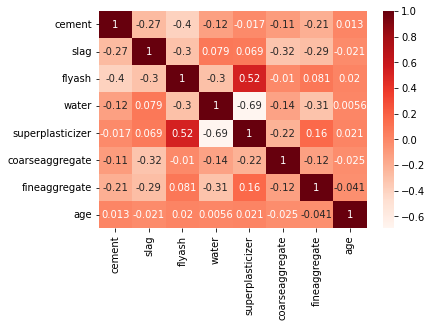

In [263]:
sns.heatmap(win_data1.corr(),cmap='Reds', annot=True)

In [76]:
win_data2 = win_data1.copy()

In [77]:
win_data2['plasticizer_per_water']=[win_data2['superplasticizer'][a]/win_data2['water'][a] for a in range(len(win_data2)) ]

In [78]:
len(win_data2['plasticizer_per_water'])

1030

In [11]:
len(list(win_data1.columns))

8

In [12]:
len(list(win_data2.columns))

9

In [277]:
list(win_data1.columns)

['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

<AxesSubplot:>

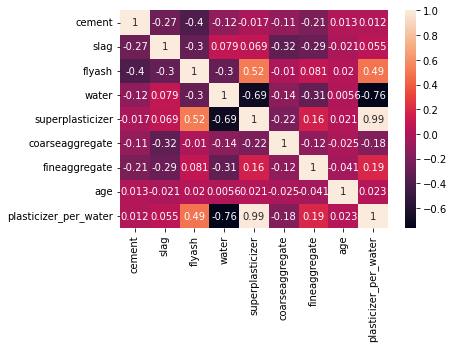

In [287]:
sns.heatmap(win_data2.corr(),annot=True)

In [13]:
win_data2 = win_data2.drop(columns=['water','superplasticizer'])
len(list(win_data2.columns))

7

In [303]:
win_data2.head()

,cement,slag,flyash,coarseaggregate,fineaggregate,age,plasticizer_per_water
0,540.0,0.0,0.0,1040.0,676.0,28,0.015432
1,540.0,0.0,0.0,1055.0,676.0,28,0.015432
2,332.5,142.5,0.0,932.0,664.3,56,0.000000
3,332.5,142.5,0.0,932.0,664.3,56,0.000000
4,198.6,132.4,0.0,978.4,825.5,56,0.000000


In [311]:
win_data2.dtypes

cement                   float64
slag                     float64
flyash                   float64
coarseaggregate          float64
fineaggregate            float64
age                        int64
plasticizer_per_water    float64
dtype: object

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [15]:
len(target)

1030

In [79]:
#Rebuilding the model
X_train2,X_test2,y_train2,y_test2 = train_test_split(win_data2,target,train_size=0.75, random_state=5)
X_train2.shape

(772, 9)

In [ ]:
X_train2.

In [21]:
len(win_data2)

1030

In [ ]:
{'ccp_alpha': 0.0005,
 'learning_rate': 0.08,
 'max_depth': 5,
 'n_estimators': 300,
 'random_state': 1}

In [80]:
grb = GradientBoostingRegressor(ccp_alpha=0.0005,learning_rate=0.08,max_depth=5,n_estimators=300,random_state=1)

In [81]:
scaler1 = StandardScaler()
X_train2s = scaler1.fit_transform(X_train2)
X_test2s = scaler1.transform(X_test2)

In [82]:
model= grb.fit(X_train2,y_train2)
model.score(X_test2,y_test2)

0.9142976325598781

([<matplotlib.axis.YTick at 0x1df5e05c340>,
 [Text(0, 0, 'cement'),
  Text(0, 1, 'slag'),
  Text(0, 2, 'flyash'),
  Text(0, 3, 'coarseaggregate'),
  Text(0, 4, 'fineaggregate'),
  Text(0, 5, 'age'),
  Text(0, 6, 'plasticizer_per_water')])

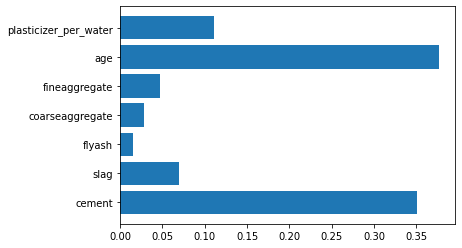

In [30]:
#Checking the most relevant features
plt.barh(range(7),grb.feature_importances_,align='center')
plt.yticks(np.arange(7),labels=list(win_data2.columns))


In [32]:
grid_params={'n_estimators':[100,200,300,400,500,600,700,800],'learning_rate':[0.001,0.0005,0.005,0.01,0.05,0.08],'max_depth':[5,6,7],'ccp_alpha':[0.0005,0.0006,0.0007],'random_state':[1]}

In [33]:
grid_search = GridSearchCV(GradientBoostingRegressor(),grid_params,cv=4)

In [34]:
model= grid_search.fit(X_train2,y_train2)
model.best_score_

0.8932566471513786

In [35]:
model.best_params_

{'ccp_alpha': 0.0007,
 'learning_rate': 0.08,
 'max_depth': 5,
 'n_estimators': 300,
 'random_state': 1}

In [36]:
model.score(X_test2,y_test2)

0.8958033438671429

<p>Model did not improve so we perform more feature engineering</p>

In [83]:
win_data2['Average_aggregate']=[(win_data2['coarseaggregate'][a]+win_data2['fineaggregate'][a])/2 for a in range(len(win_data2)) ]

In [84]:
win_data2.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'plasticizer_per_water',
       'Average_aggregate'],
      dtype='object')

In [ ]:
win_data2= win_data2.drop(columns=['coarseaggregate','fineaggregate'])

In [85]:
#Rebuilding the model
X_train2,X_test2,y_train2,y_test2 = train_test_split(win_data2,target,train_size=0.75, random_state=5)
X_train2.shape

(772, 10)

In [86]:
win_data2.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'plasticizer_per_water',
       'Average_aggregate'],
      dtype='object')

In [87]:
grb = GradientBoostingRegressor(ccp_alpha=0.0005,learning_rate=0.08,max_depth=5,n_estimators=300,random_state=1)

In [88]:
scaler1 = StandardScaler()
X_train2s = scaler1.fit_transform(X_train2)
X_test2s = scaler1.transform(X_test2)

In [89]:
model= grb.fit(X_train2,y_train2)
model.score(X_test2,y_test2)

0.9107257922855916

In [90]:
win_data2= win_data2.drop(columns=['flyash'])
#Rebuilding the model
X_train2,X_test2,y_train2,y_test2 = train_test_split(win_data2,target,train_size=0.75, random_state=5)
X_train2.shape

(772, 9)

In [91]:
grb = GradientBoostingRegressor(ccp_alpha=0.0005,learning_rate=0.08,max_depth=5,n_estimators=300,random_state=1)
scaler1 = StandardScaler()
X_train2s = scaler1.fit_transform(X_train2)
X_test2s = scaler1.transform(X_test2)
model= grb.fit(X_train2,y_train2)
model.score(X_test2,y_test2)

0.9090786130466529

###### Results
<p>Further feature engineering did not improve model in any significant way</p>

### Best Model Selected

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [123]:
data = pd.read_csv('Concrete_Data.csv')
target = data['csMPa']
final_data= data.drop(columns=['csMPa'])

In [124]:
X_train,X_test,y_train,y_test = train_test_split(final_data,target,train_size=0.75,random_state=7)
algorithm = GradientBoostingRegressor(ccp_alpha=0.0005,learning_rate=0.08,max_depth=4,n_estimators=300,random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model= algorithm.fit(X_train,y_train)
model.score(X_test,y_test)

0.9537832125565202

In [125]:
model.score(X_train,y_train)

0.9866128166635063

### Saving and Loading  The Model

In [126]:
import joblib

In [127]:
joblib.dump(model,'concrete_model.sav')

['concrete_model.sav']

In [128]:
load_model = joblib.load('concrete_model.sav')
load_model.score(X_test,y_test)

0.9537832125565202

### Making Predictions
<p> Given a 30year old concrete mixture containing cement of 400kg/m3 of mixture, slag of 100kg/m3 of mixture, flyash of 150kg/m3, 300kg water per m3 of mixture, 10kg/m3 superplasticizer, 1000kg/m3 coarseaggregate and 1200kg/m3 fineaggregate. Predict the  compressive strength of the resulting concrete</p>

In [138]:
raw_data = [[400,100,150,300,10,1000,1200,30]]
scale=StandardScaler()
input_data = scale.fit_transform(raw_data)

In [141]:
concrete_model = joblib.load('concrete_model.sav')
prediction = concrete_model.predict(input_data)[0]
print('The compressive strength of the concrete is expected to be '+str(prediction)+'MPa')

The compressive strength of the concrete is expected to be 43.35512850449995MPa
